In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Import modules

In [2]:
!pip install smote_variants

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 9.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.8 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=2b8b24bac8017cf7a218951c3da1b6fed8c2b4788ff1d3a0b0429a8a281075f5
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7435 sha256=e2fc86eb6d951ae912037937e73c57f483db4ac409e8d00b962e75a1bfc3101b
  Stored in directory: /root/.cache/pip/wheels/a7/30/34/fceae1c718a4e749dd51f479c5720c0671519887e824915e90
Successfully built minisom statistics


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
import smote_variants as sv
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import optuna
warnings.filterwarnings("ignore")
import time

# Load the Datasets

In [4]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [5]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Check null values

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values.

# EDA (Exploratory Data Analysis)

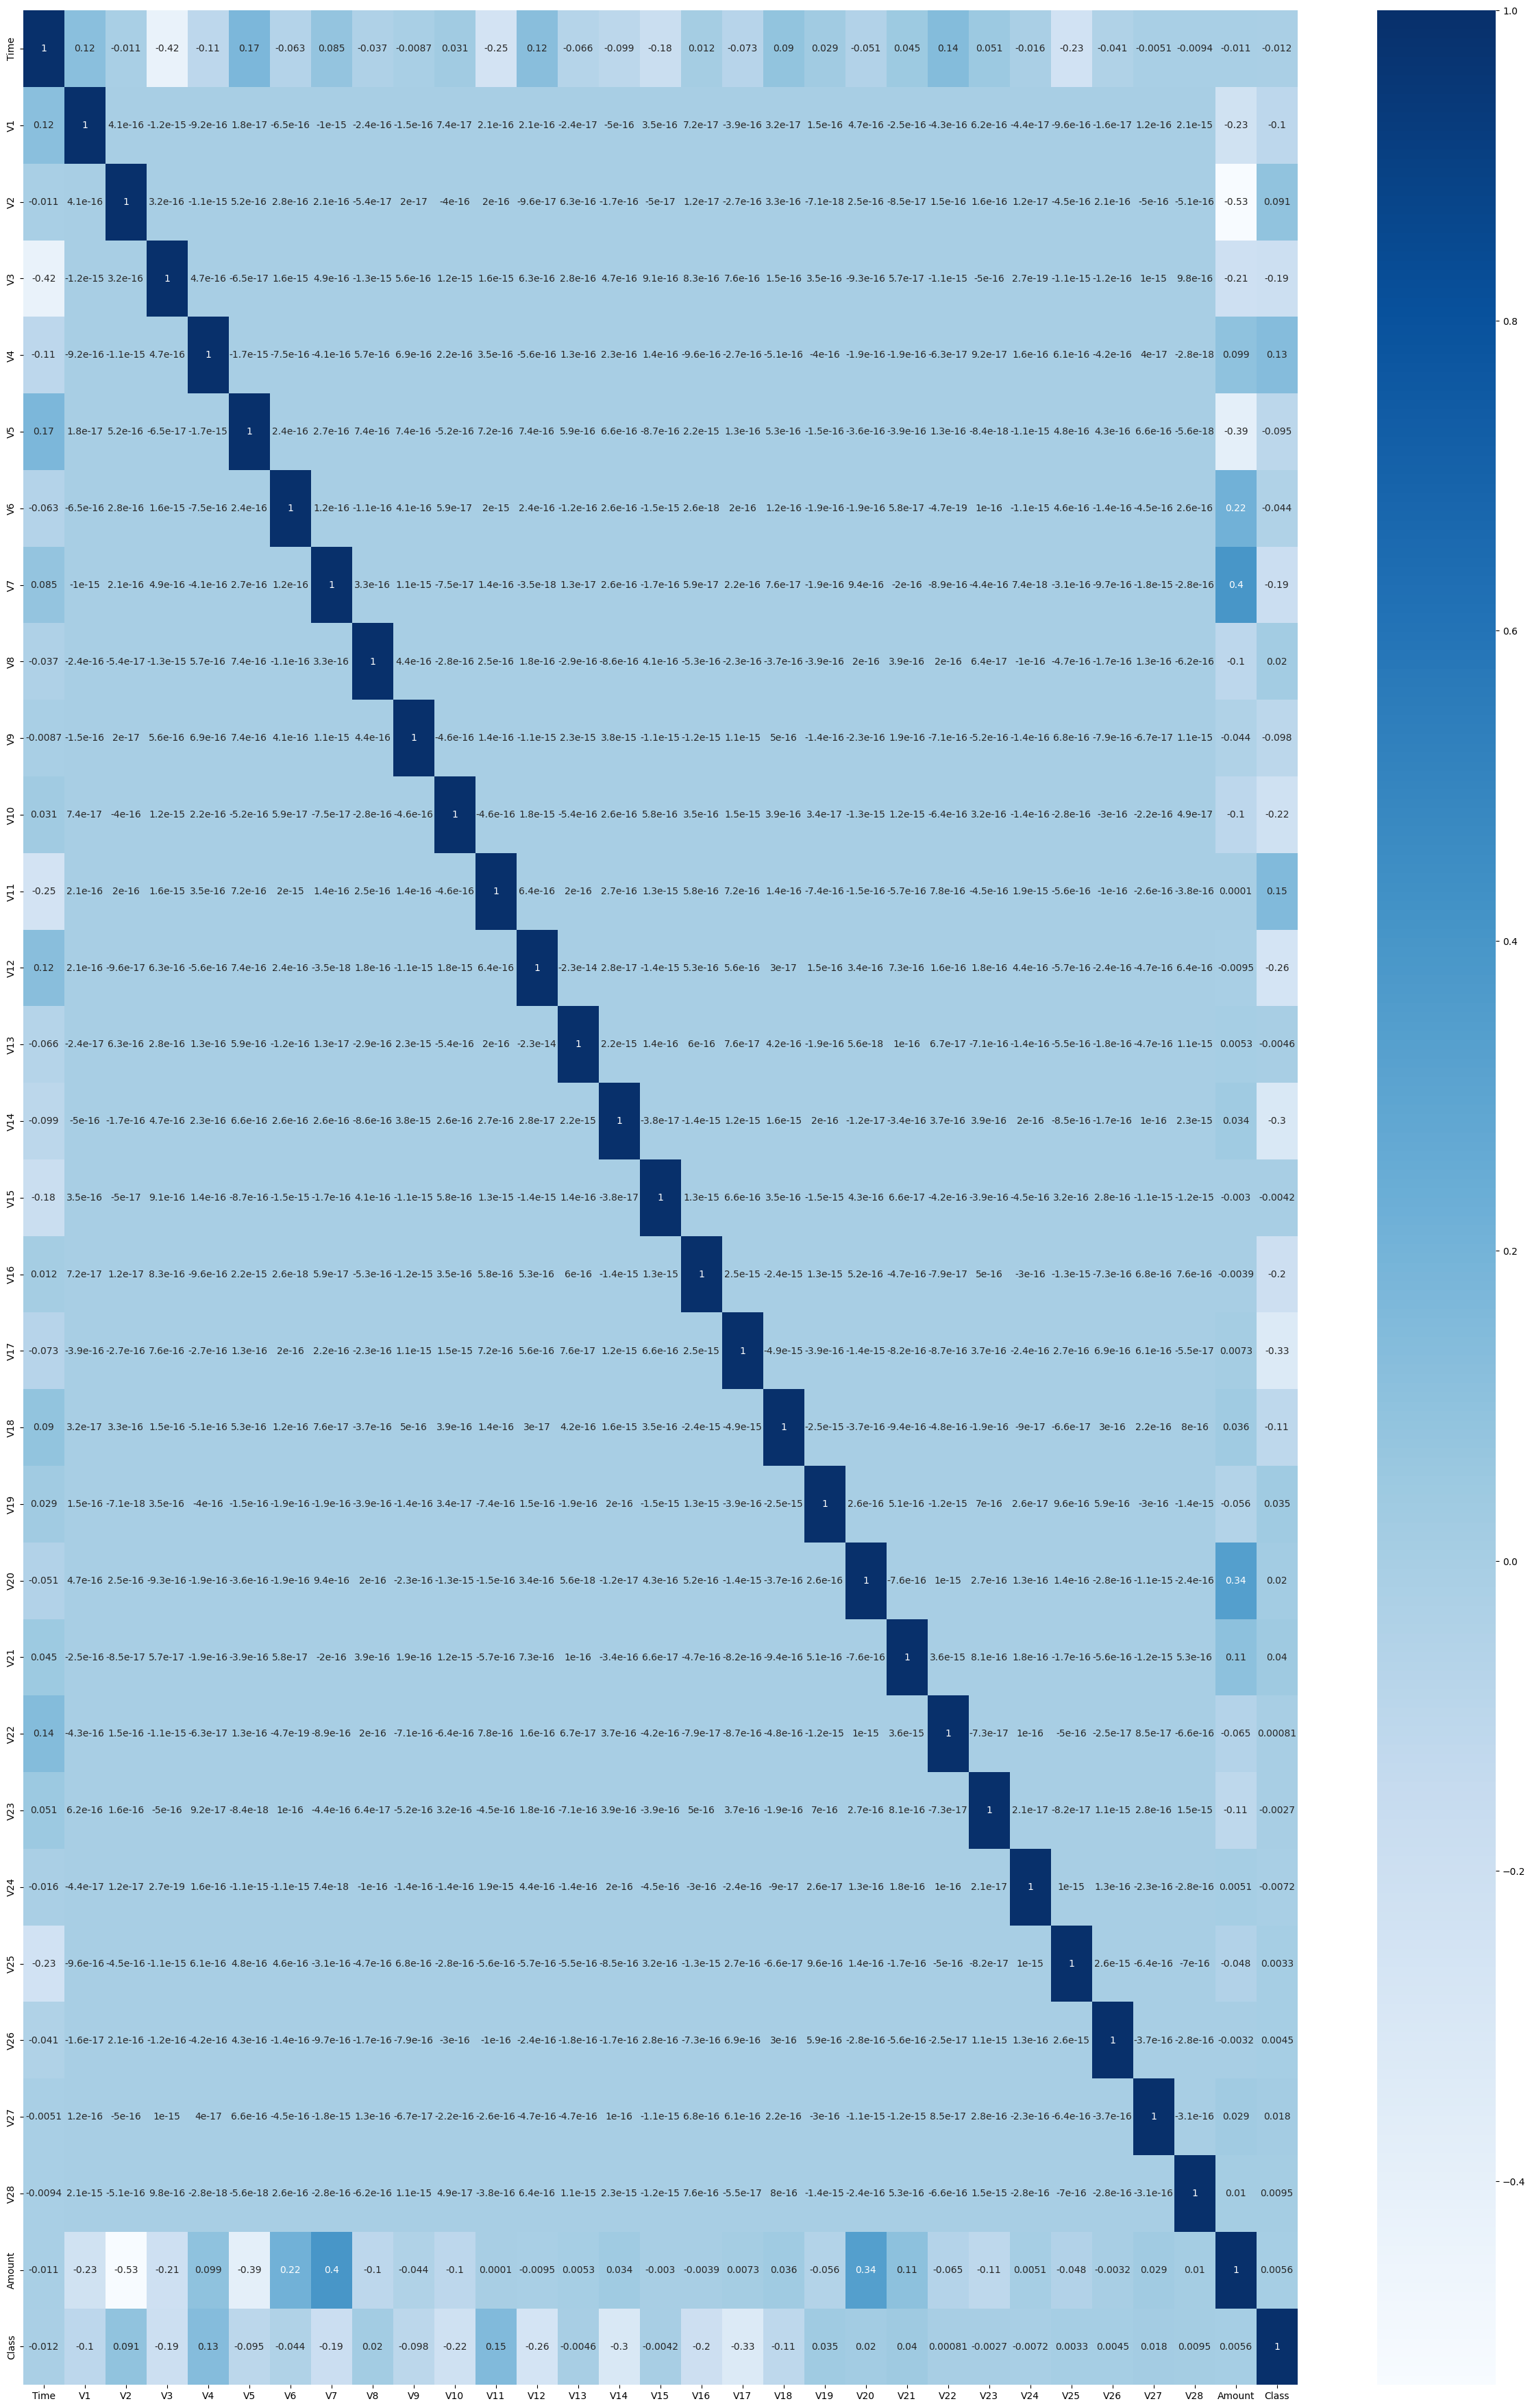

In [7]:
# We draw a correlation heatmap of the data
fig, ax = plt.subplots(figsize=(30,45))
heatmap = sns.heatmap(data.corr(), cmap = 'Blues', annot = True, ax = ax)

It can be observed that a number of features have a baseline level of correlation with the class, but no features are heavily influencing the class.

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


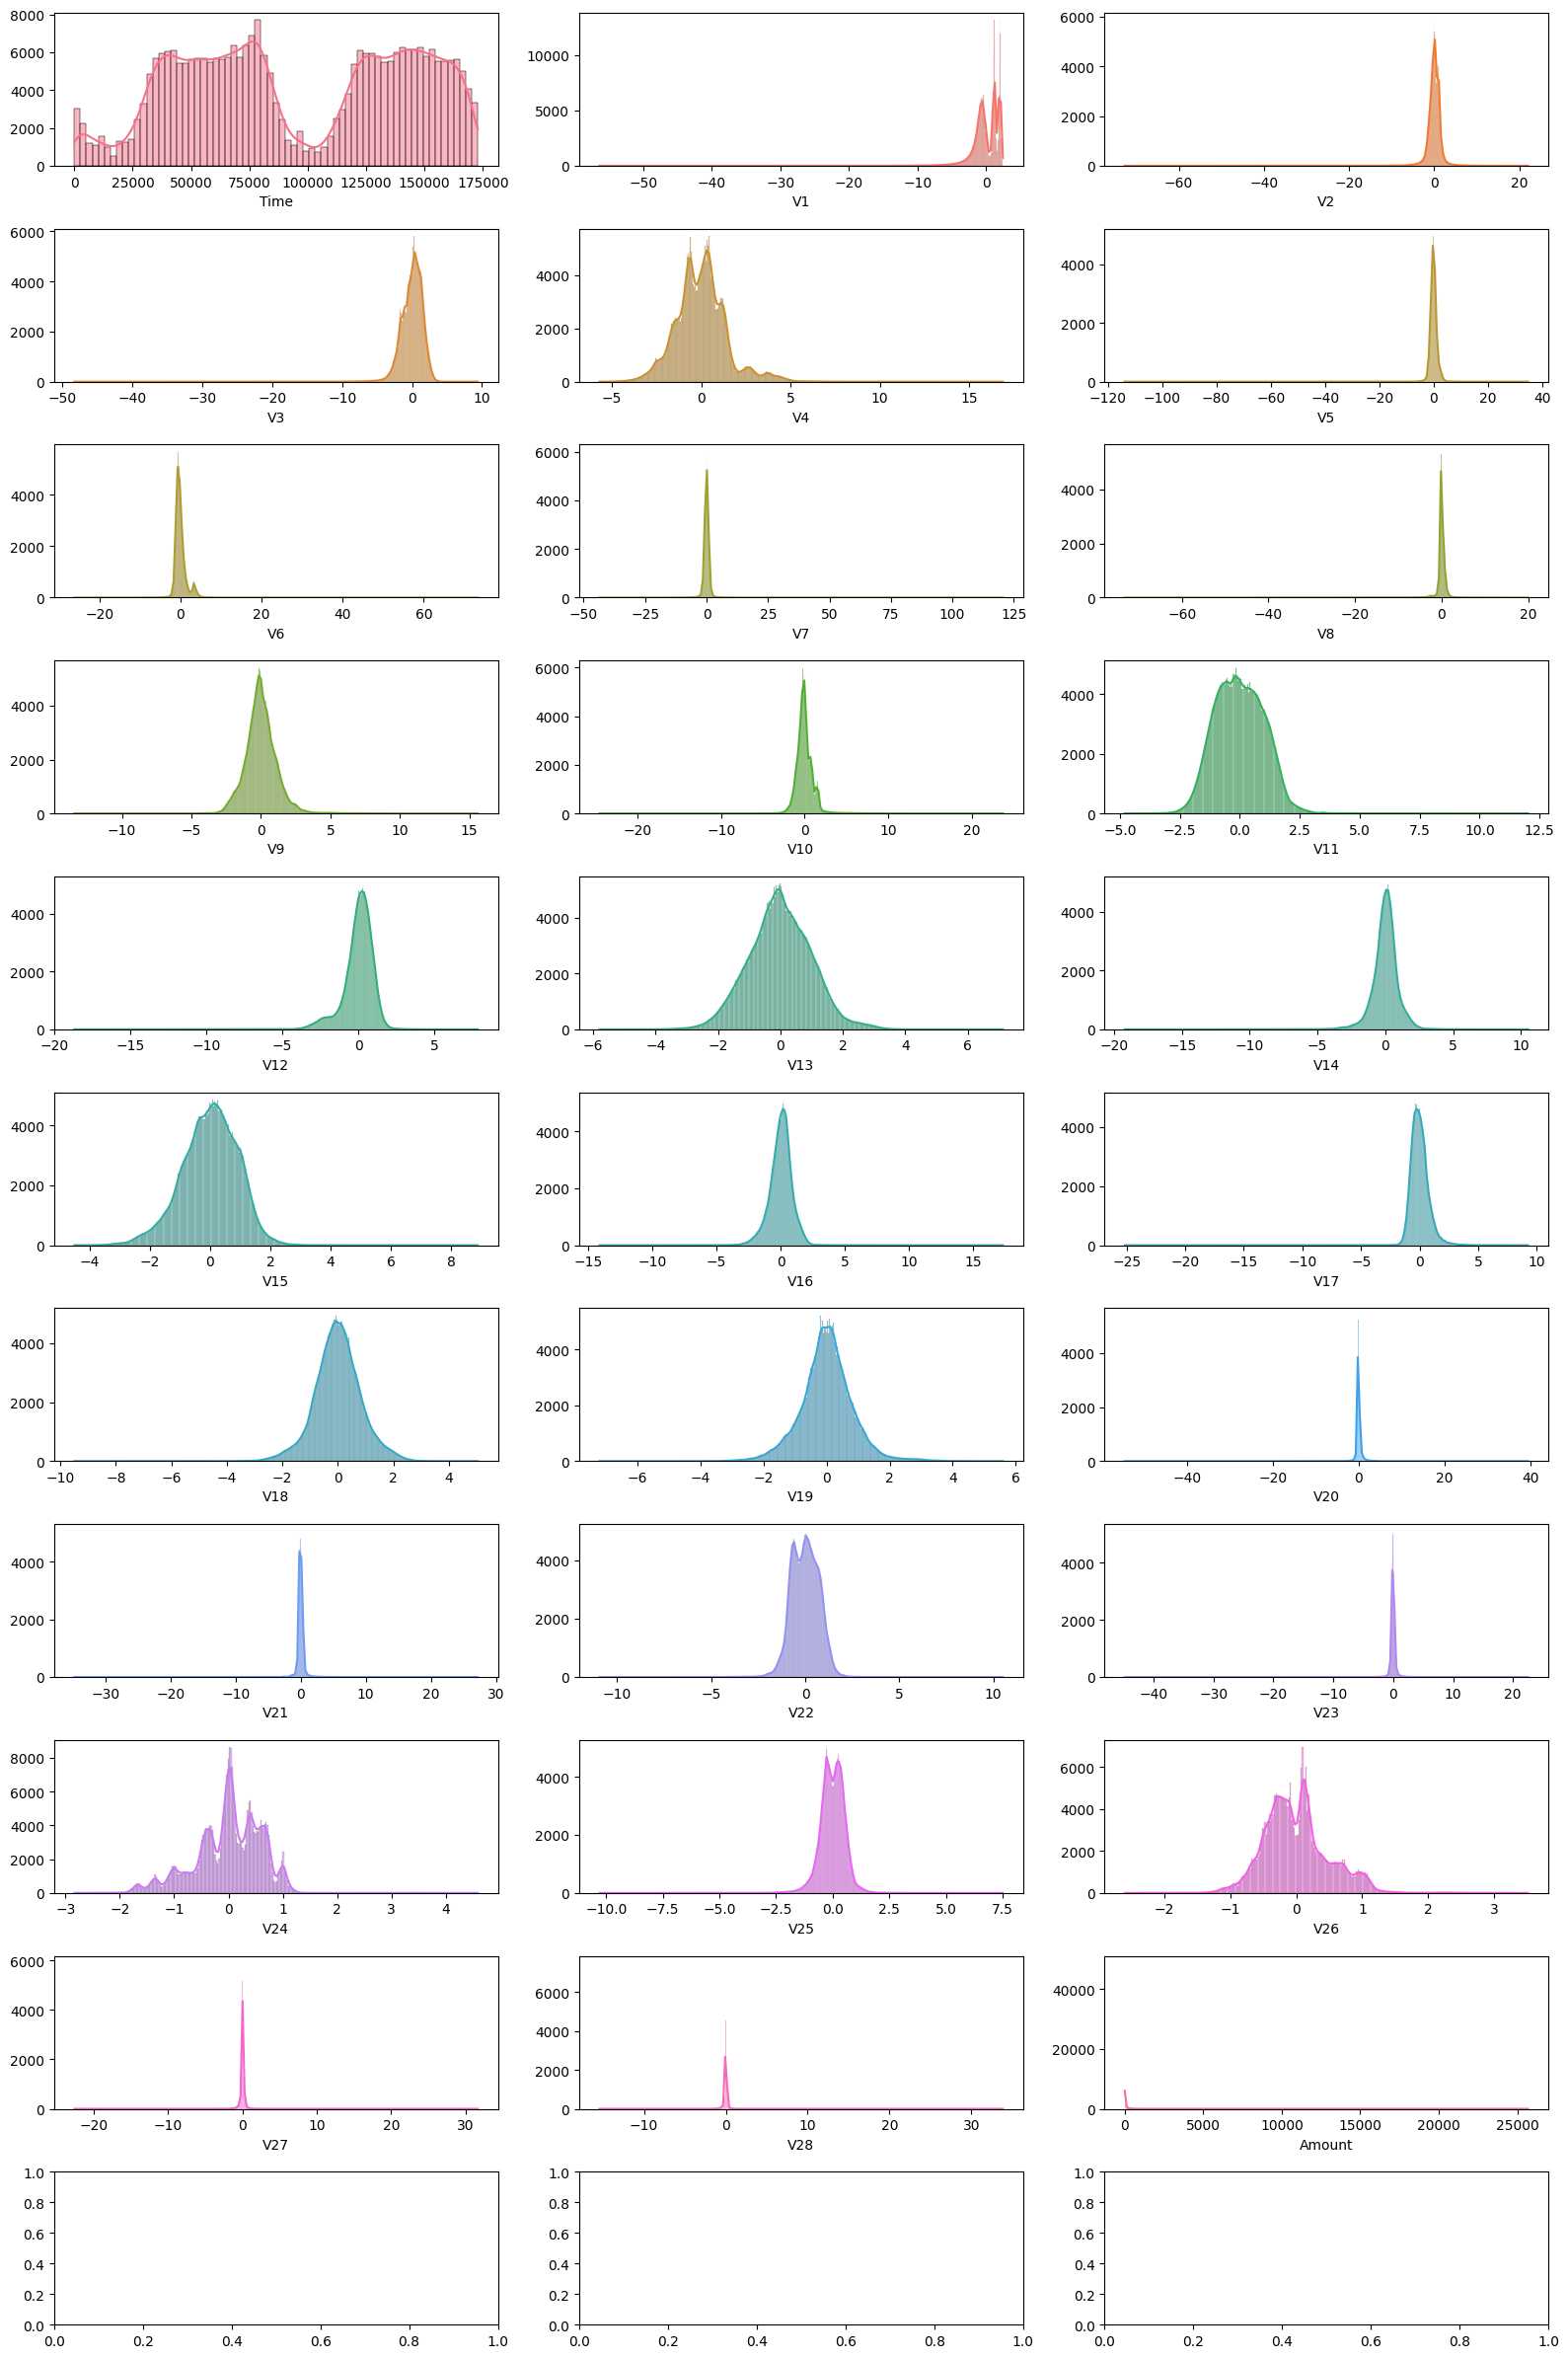

In [9]:
# Histplot for all features
cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
colors = sns.color_palette('husl', len(cols))

fig, ax = plt.subplots(11,3, figsize=(16, 24))
ax = ax.flatten()

for i in range(len(cols)):
    sns.histplot(data[cols[i]], kde = True, ax = ax[i], color = colors[i])
    ax[i].set_ylabel("")

plt.tight_layout()
plt.show()

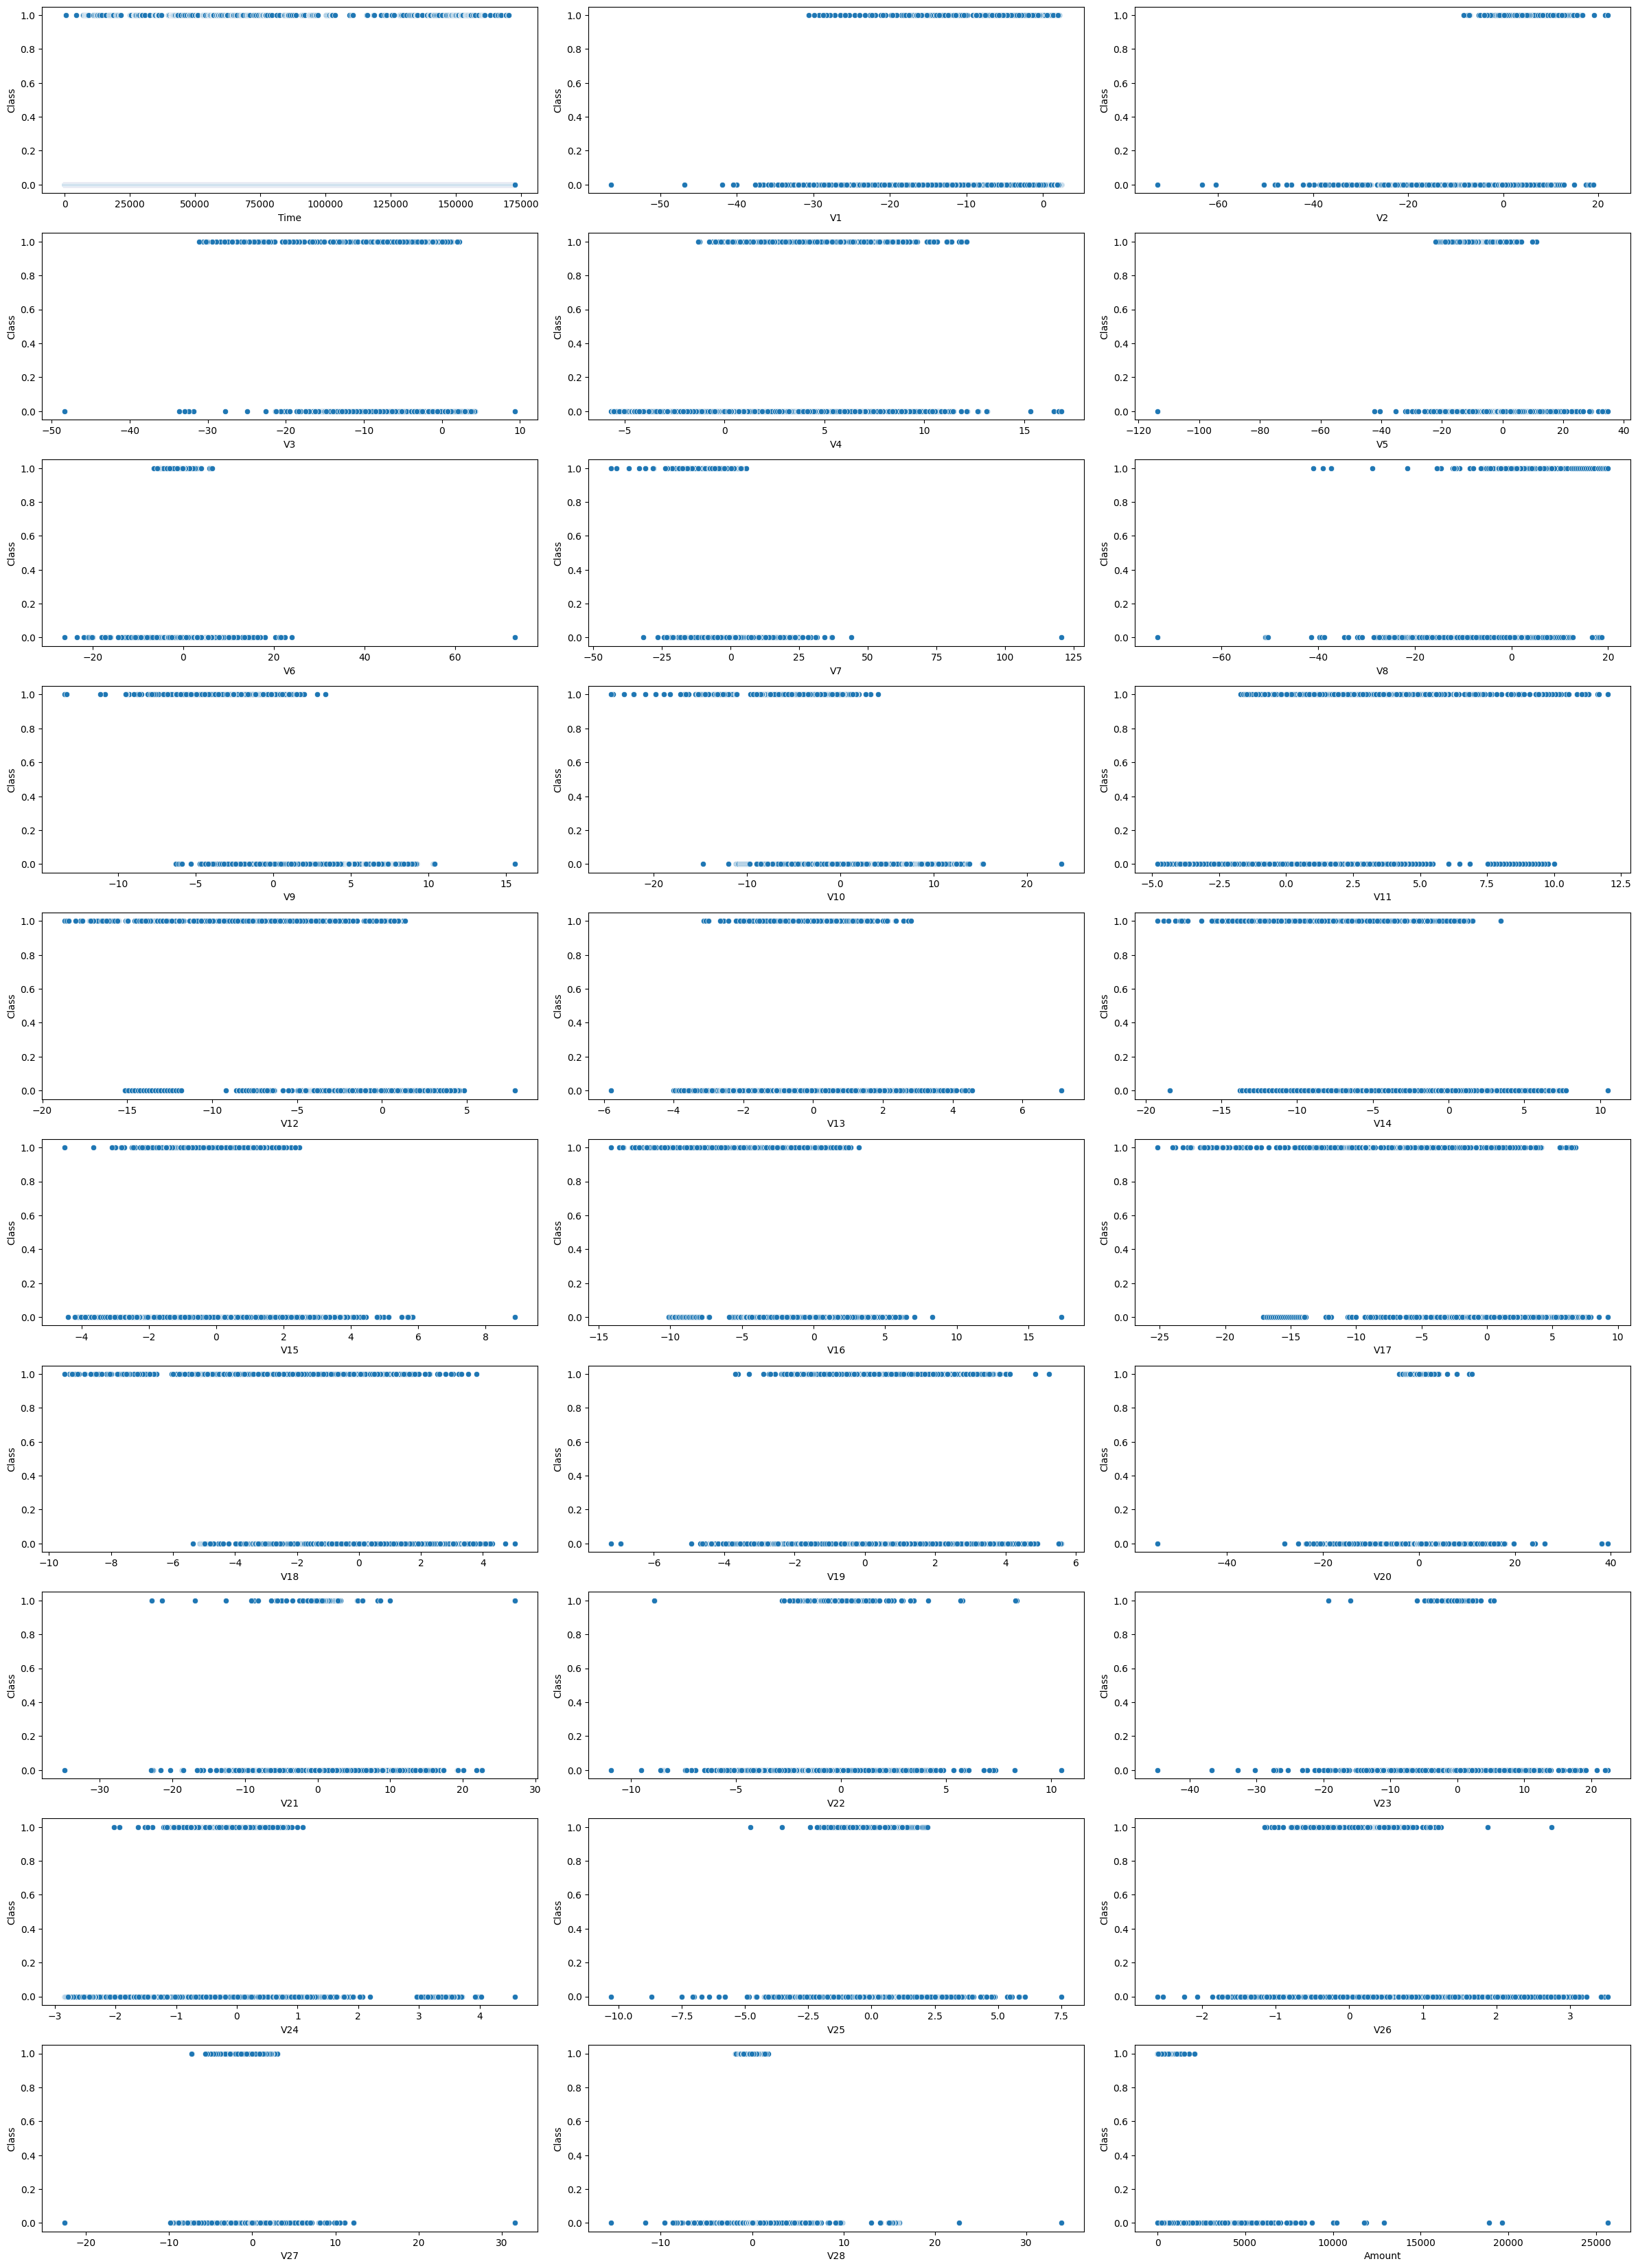

In [10]:
# Scatterplots for drawing relation between 'Class' and other features
# I need to remember that these are better suited for categorical features
fig, ax = plt.subplots(11,3, figsize=(24, 36))
ax = ax.flatten()

for i in range(len(ax)):
    if i < len(cols):
        sns.scatterplot(x = cols[i], y = 'Class', data = data, ax = ax[i])
        #ax = ax.set_ylabel("")
    else:
        fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [11]:
#Lets seperate the data on the basis of fraud or legit
dataFraud = data[data['Class'] == 1]
dataLegit = data[data['Class'] == 0]

#We can start by checking the amount in both cases
print("Details about Fraud amount:\n",dataFraud['Amount'].describe())
print("\nDetails about Legit amount:\n",dataLegit['Amount'].describe())

Details about Fraud amount:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Details about Legit amount:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


From above details, we can see that the mean amount for frauds are much higher than the amount for the legitimate transactions.

### Lets take the min correlation required for a feature to be 
1. Negative Correlation: -0.1
2. Positive Correlation: +0.1

In [12]:
#We take out the 
correlated_features = data.corr()[['Class']][(data.corr()['Class'] <= -0.1) | (data.corr()['Class'] >= 0.1)]
columns = correlated_features.index
print(columns)

Index(['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
       'Class'],
      dtype='object')


So the above features can be used, since seeing their correlation is at the previously prescribed level.

<Axes: xlabel='Class', ylabel='count'>

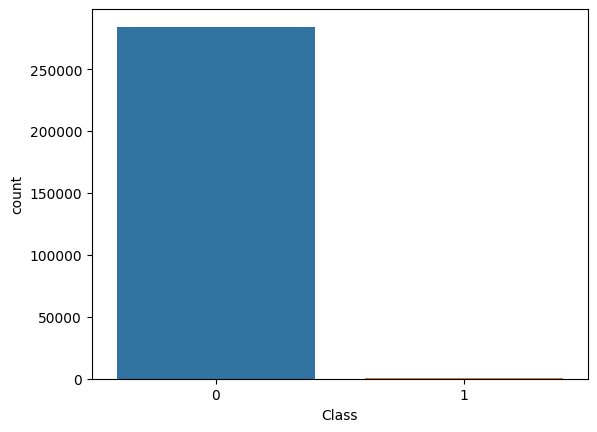

In [13]:
# Class distribution check
sns.countplot(x = 'Class', data = data)

In [14]:
print(f"Above countplot shows that about only {round((len(data[data['Class'] == 1]) / data.shape[0]) * 100, 2)}% of the data is fraudulent and the rest are all legitimate.")

Above countplot shows that about only 0.17% of the data is fraudulent and the rest are all legitimate.


There is a presence of a very large class imbalance here, So I plan to oversample the minority class, so as to balance both of them.

### Outlier Analysis

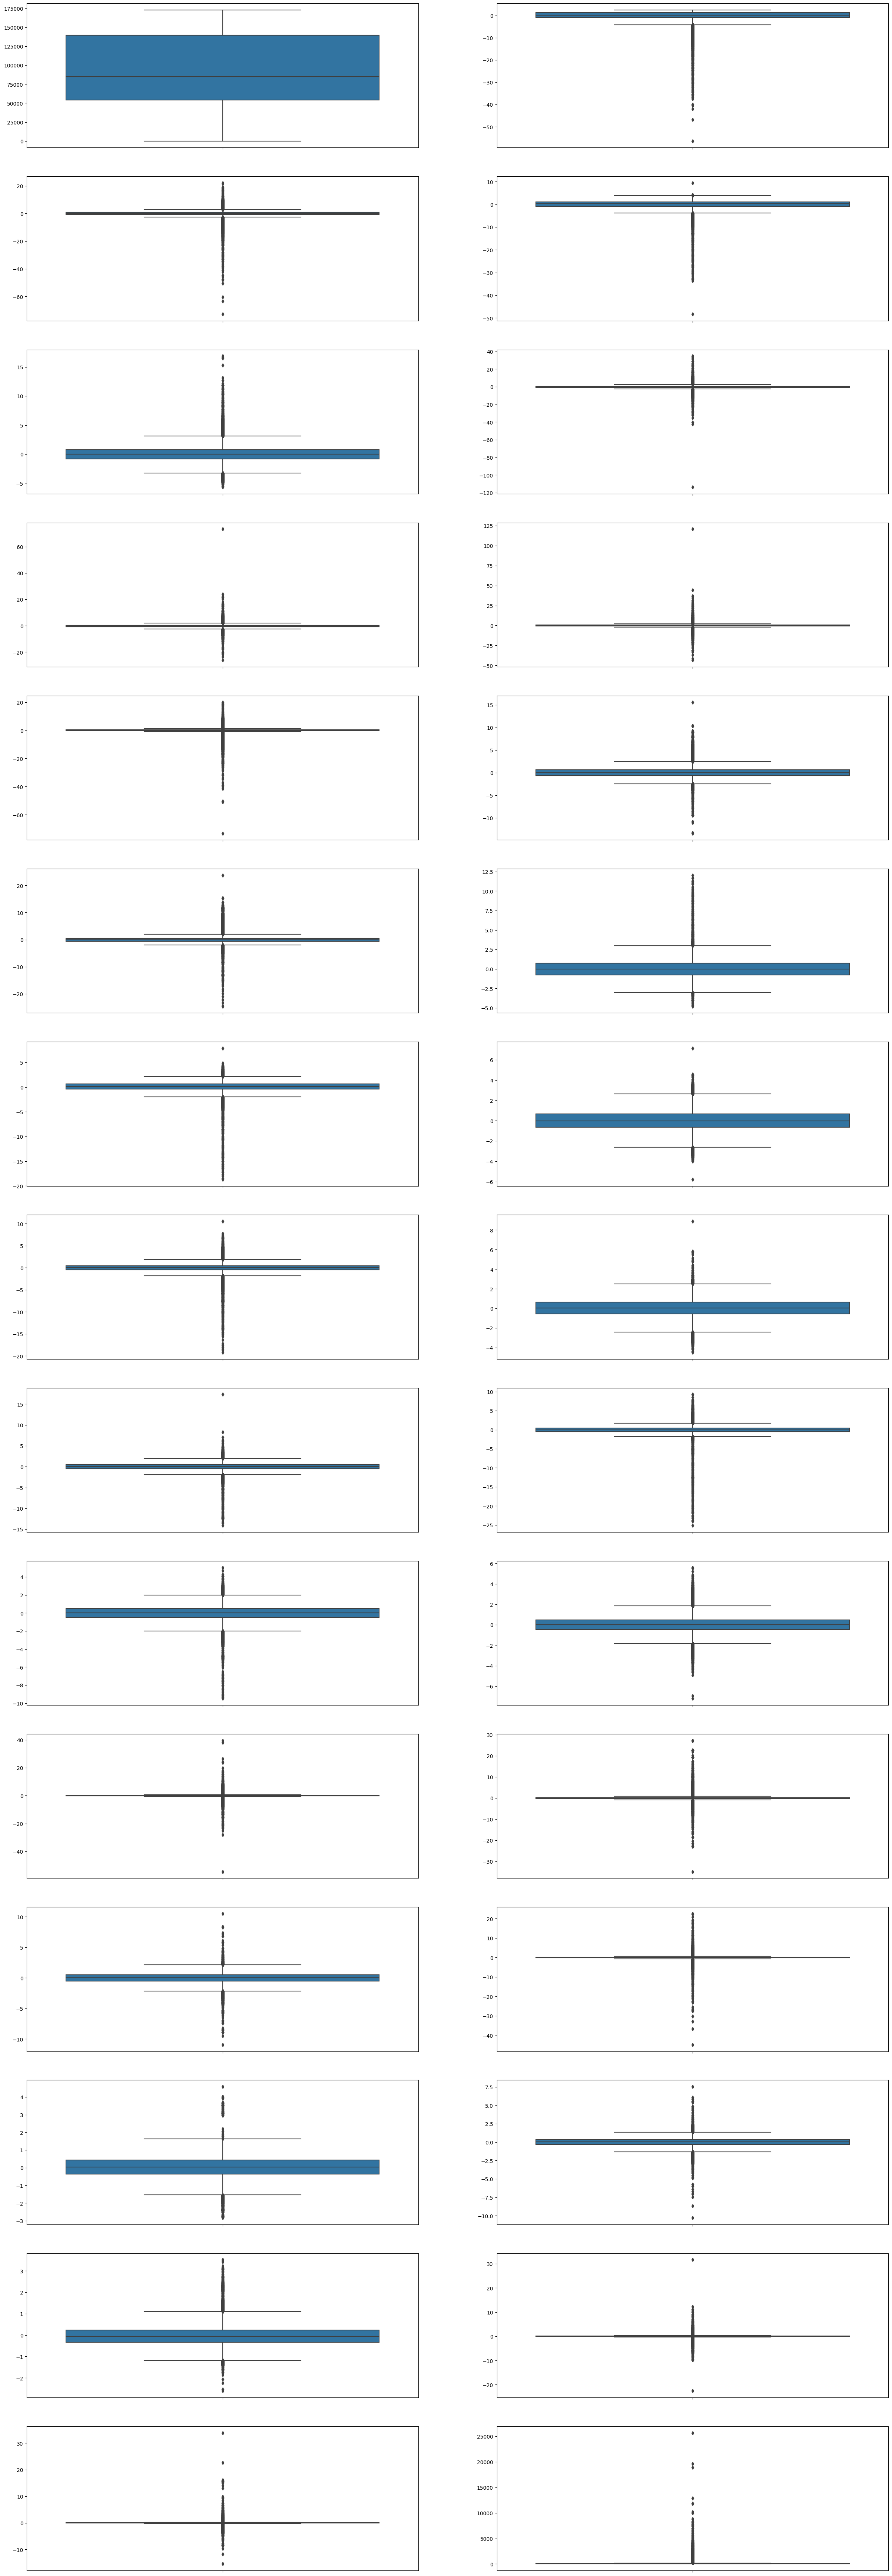

In [15]:
# #Let's first create a few boxplots for it
fig, ax = plt.subplots(15,2, figsize=(30,90))
ax = ax.flatten()

for i in range(len(cols)):
    sns.boxplot(y = data[cols[i]], ax = ax[i])
    ax[i].set_ylabel("")


Above boxplots show us that there are a number of outliers here. Since the majority of the data is legitimate, I'will use this later to create an outlier feature for the features present in columns.

# Over - Sampling (SMOTE)

I will oversample the fraudulent transaction data, but only after splitting it, since it can lead to data leakage to the test set. This might give rise to overfitting, so we need to take care here.

In [16]:
# Split the target and other data
Y = data['Class']
X = data.drop(['Class'], axis = 1)
print("X",X.describe(),"Y",Y.describe(), sep=  "\n\n")

X

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.369007e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.500885e-15 -5.620335e-16  1.149614e-16 -2.426963e-15   
std    1.380247e+00  1.332271e+00  1.23

In [17]:
# split into trainset and testset
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [18]:
# begin oversample for trainSet
smote = sv.SMOTE()
X_train_resampled, Y_train_resampled = smote.sample(X_train.values, Y_train.values)

2025-07-31 10:34:42,469:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2025-07-31 10:34:42,476:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2025-07-31 10:34:42,477:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2025-07-31 10:34:42,528:INFO:SMOTE: simplex sampling with n_dim 2


In [19]:
# Convert back to dataframe
X_train_resampled = pd.DataFrame(X_train_resampled, columns = X.columns)
Y_train_resampled = pd.Series(Y_train_resampled)

In [20]:
print("X_train_resampled",X_train_resampled.info(),"Y_train_resampled",Y_train_resampled.info(), sep = "\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454902 entries, 0 to 454901
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    454902 non-null  float64
 1   V1      454902 non-null  float64
 2   V2      454902 non-null  float64
 3   V3      454902 non-null  float64
 4   V4      454902 non-null  float64
 5   V5      454902 non-null  float64
 6   V6      454902 non-null  float64
 7   V7      454902 non-null  float64
 8   V8      454902 non-null  float64
 9   V9      454902 non-null  float64
 10  V10     454902 non-null  float64
 11  V11     454902 non-null  float64
 12  V12     454902 non-null  float64
 13  V13     454902 non-null  float64
 14  V14     454902 non-null  float64
 15  V15     454902 non-null  float64
 16  V16     454902 non-null  float64
 17  V17     454902 non-null  float64
 18  V18     454902 non-null  float64
 19  V19     454902 non-null  float64
 20  V20     454902 non-null  float64
 21  V21     45

#### now we can begin modelling the traindata

# Modelling

1. I will use XGBoost models here
2. for hyperparameter selection, I will be making an optuna study object 

Let's start

## XGBoost

In [21]:
# first we define our optuna objective function

#with oversampled data
def objective(trial):
    param = {
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'tree_method':'hist',
    'scale_pos_weight':trial.suggest_float('scale_pos_weight',1,100),
    'max_depth':trial.suggest_int('max_depth',3,12),
    'learning_rate':trial.suggest_float('learning_rate',0.01, 0.3),
    'subsample':trial.suggest_float('subsample',0.5,1.0),
    'colsample_bytree':trial.suggest_float('colsample_bytree', 0.5, 1.0),
    'lambda':trial.suggest_float('lambda',1e-3, 10.0),
    'alpha':trial.suggest_float('alpha',1e-3,10.0)
    }

    model = XGBClassifier(**param, use_label_encoder = False)
    model.fit(X_train_resampled, Y_train_resampled)
    preds = model.predict(X_test)
    return precision_score(Y_test, preds)

#without oversampled data
def objective_no_osmpl(trial):
    param = {
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'tree_method':'hist',
    'scale_pos_weight':trial.suggest_float('scale_pos_weight',1,100),
    'max_depth':trial.suggest_int('max_depth',3,12),
    'learning_rate':trial.suggest_float('learning_rate',0.01, 0.3),
    'subsample':trial.suggest_float('subsample',0.5,1.0),
    'colsample_bytree':trial.suggest_float('colsample_bytree', 0.5, 1.0),
    'lambda':trial.suggest_float('lambda',1e-3, 10.0),
    'alpha':trial.suggest_float('alpha',1e-3,10.0)
    }

    model = XGBClassifier(**param, use_label_encoder = False)
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    return precision_score(Y_test, preds)

In [22]:
# Now we can start the optuna study object for oversampled data
study = optuna.create_study(direction = 'maximize')
optuna.logging.set_verbosity(optuna.logging.INFO)
study.optimize(objective, n_trials = 50)

[I 2025-07-31 10:34:43,438] A new study created in memory with name: no-name-34efa349-d46b-4369-8250-28d0bf008f32
[I 2025-07-31 10:34:49,177] Trial 0 finished with value: 0.6013986013986014 and parameters: {'scale_pos_weight': 67.82814589788062, 'max_depth': 8, 'learning_rate': 0.28776016884456745, 'subsample': 0.5341340129423168, 'colsample_bytree': 0.6162842842241981, 'lambda': 8.959158195236219, 'alpha': 8.356288731711539}. Best is trial 0 with value: 0.6013986013986014.
[I 2025-07-31 10:34:55,878] Trial 1 finished with value: 0.8 and parameters: {'scale_pos_weight': 98.86912378824584, 'max_depth': 11, 'learning_rate': 0.18831290702728026, 'subsample': 0.9438318156668775, 'colsample_bytree': 0.5800064820627674, 'lambda': 1.614169292821954, 'alpha': 0.2243875206384081}. Best is trial 1 with value: 0.8.
[I 2025-07-31 10:35:01,622] Trial 2 finished with value: 0.8137254901960784 and parameters: {'scale_pos_weight': 2.091966108951332, 'max_depth': 8, 'learning_rate': 0.2707323410627631,

In [23]:
# Now we use the best model available from the study object
best_params = study.best_params
final_model = XGBClassifier(**best_params)
final_model.fit(X_train_resampled,Y_train_resampled)
final_preds = final_model.predict(X_test)
final_preds_proba = final_model.predict_proba(X_test)[:,1]

Model: XGBClassifier with hyperparams tuned with Optuna(using oversampling)
Acuracy Score : 0.9995259997893332
ROC_AUC Score : 0.9885627576860795
Precision Score : 0.8585858585858586
Recall Score : 0.8673469387755102
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.87      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix : 



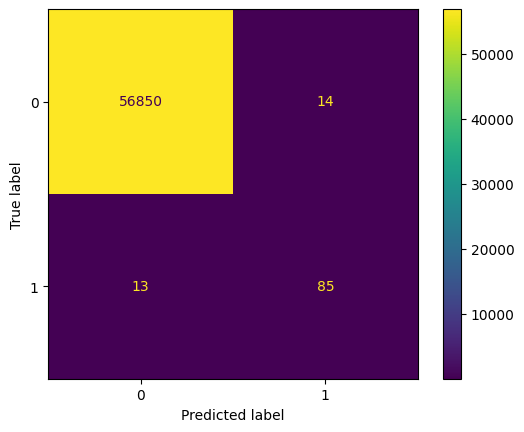

In [24]:
print(f"Model: XGBClassifier with hyperparams tuned with Optuna(using oversampling)")
print(f"Acuracy Score : {accuracy_score(Y_test, final_preds)}")
print(f"ROC_AUC Score : {roc_auc_score(Y_test, final_preds_proba)}")
print(f"Precision Score : {precision_score(Y_test, final_preds)}")
print(f"Recall Score : {recall_score(Y_test, final_preds)}")
print(f"Classification Report : \n{classification_report(Y_test, final_preds)}")
print(f"Confusion Matrix : \n")
cm = confusion_matrix(Y_test, final_preds)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_disp.plot()
plt.show()

In [25]:
# Now let's do one without any oversampled data
study_no_osmpl = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.INFO)
study_no_osmpl.optimize(objective_no_osmpl, n_trials = 50)

[I 2025-07-31 10:39:53,013] A new study created in memory with name: no-name-318a8266-1834-497e-84ef-70b9c0d35ebc
[I 2025-07-31 10:39:55,669] Trial 0 finished with value: 0.9325842696629213 and parameters: {'scale_pos_weight': 91.8558907514505, 'max_depth': 10, 'learning_rate': 0.285037532894235, 'subsample': 0.9285754137056819, 'colsample_bytree': 0.7757082589803528, 'lambda': 4.9881504052377945, 'alpha': 9.657586834291857}. Best is trial 0 with value: 0.9325842696629213.
[I 2025-07-31 10:39:57,495] Trial 1 finished with value: 0.7049180327868853 and parameters: {'scale_pos_weight': 38.694904612055694, 'max_depth': 3, 'learning_rate': 0.1092172110904158, 'subsample': 0.9506277668066395, 'colsample_bytree': 0.5249175103109706, 'lambda': 7.456500852471451, 'alpha': 1.3563934982071295}. Best is trial 0 with value: 0.9325842696629213.
[I 2025-07-31 10:40:00,583] Trial 2 finished with value: 0.8369565217391305 and parameters: {'scale_pos_weight': 84.4119347582308, 'max_depth': 9, 'learning

In [26]:
# Now we use the best model available from the study object
best_params_no_osmpl = study_no_osmpl.best_params
final_model_no_osmpl = XGBClassifier(**best_params_no_osmpl)
final_model_no_osmpl.fit(X_train,Y_train)
final_preds_no_osmpl = final_model_no_osmpl.predict(X_test)
final_preds_proba_no_osmpl = final_model_no_osmpl.predict_proba(X_test)[:,1]

In [27]:
print(best_params_no_osmpl)
current_best_params = {'scale_pos_weight': 78.57430538184474, 'max_depth': 8, 'learning_rate': 0.06652468265122302, 'subsample': 0.5448735006411912, 'colsample_bytree': 0.589726256778842, 'lambda': 0.7338360146192704, 'alpha': 1.153045098777132}

{'scale_pos_weight': 27.821673246379397, 'max_depth': 9, 'learning_rate': 0.21355671818376684, 'subsample': 0.8438650478437363, 'colsample_bytree': 0.6199118517365377, 'lambda': 6.574353705124706, 'alpha': 4.267962834018799}


Model: XGBClassifier with hyperparams tuned with Optuna(no oversampling)
Acuracy Score : 0.9996839998595555
ROC_AUC Score : 0.9824809355368485
Precision Score : 0.9761904761904762
Recall Score : 0.8367346938775511
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.84      0.90        98

    accuracy                           1.00     56962
   macro avg       0.99      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



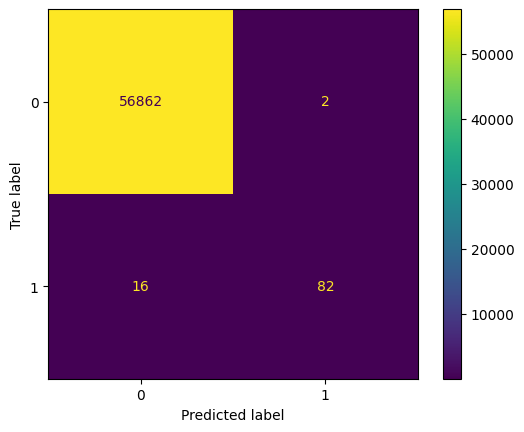

In [28]:
print(f"Model: XGBClassifier with hyperparams tuned with Optuna(no oversampling)")
print(f"Acuracy Score : {accuracy_score(Y_test, final_preds_no_osmpl)}")
print(f"ROC_AUC Score : {roc_auc_score(Y_test, final_preds_proba_no_osmpl)}")
print(f"Precision Score : {precision_score(Y_test, final_preds_no_osmpl)}")
print(f"Recall Score : {recall_score(Y_test, final_preds_no_osmpl)}")
print(f"Classification Report : \n{classification_report(Y_test, final_preds_no_osmpl)}")
cm = confusion_matrix(Y_test, final_preds_no_osmpl)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_disp.plot()
plt.show()

In [29]:
#Save the above model
import joblib
joblib.dump(final_model_no_osmpl, "CreditCardFraudXGB.pkl")

['CreditCardFraudXGB.pkl']

Model: XGBClassifier (Baseline --- No Oversampling
Acuracy Score : 0.9995611109160493
ROC_AUC Score : 0.9811164195560047
Precision Score : 0.9620253164556962
Recall Score : 0.7755102040816326
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



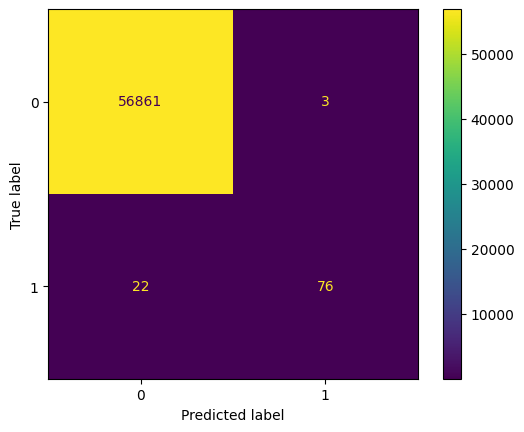

In [30]:
#Let's run a baseline model for comparison

#without oversampling
model = XGBClassifier()
model.fit(X_train, Y_train)
base_preds = model.predict(X_test)
base_preds_proba = model.predict_proba(X_test)[:,1]

print(f"Model: XGBClassifier (Baseline --- No Oversampling")
print(f"Acuracy Score : {accuracy_score(Y_test, base_preds)}")
print(f"ROC_AUC Score : {roc_auc_score(Y_test, base_preds_proba)}")
print(f"Precision Score : {precision_score(Y_test, base_preds)}")
print(f"Recall Score : {recall_score(Y_test, base_preds)}")
print(f"Classification Report : \n{classification_report(Y_test, base_preds)}")
cm = confusion_matrix(Y_test, base_preds)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_disp.plot()
plt.show()

Model: XGBClassifier (Baseline --- With Oversampling
Acuracy Score : 0.9994557775359011
ROC_AUC Score : 0.9829787218770456
Precision Score : 0.845360824742268
Recall Score : 0.8367346938775511
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



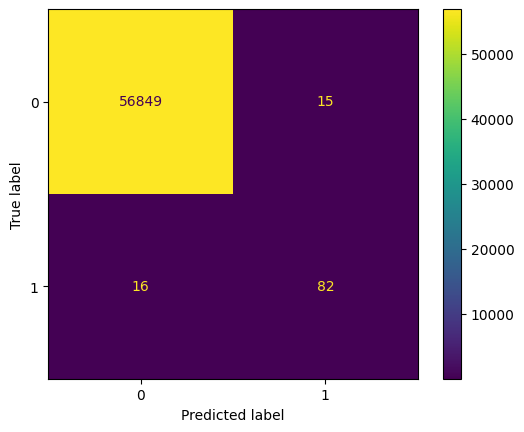

In [31]:
#with oversampling
model_y_osmpl = XGBClassifier()
model_y_osmpl.fit(X_train_resampled, Y_train_resampled)
base_preds_y_osmpl = model_y_osmpl.predict(X_test)
base_preds_proba_y_osmpl = model_y_osmpl.predict_proba(X_test)[:,1]

print(f"Model: XGBClassifier (Baseline --- With Oversampling")
print(f"Acuracy Score : {accuracy_score(Y_test, base_preds_y_osmpl)}")
print(f"ROC_AUC Score : {roc_auc_score(Y_test, base_preds_proba_y_osmpl)}")
print(f"Precision Score : {precision_score(Y_test, base_preds_y_osmpl)}")
print(f"Recall Score : {recall_score(Y_test, base_preds_y_osmpl)}")
print(f"Classification Report : \n{classification_report(Y_test, base_preds_y_osmpl)}")
cm = confusion_matrix(Y_test, base_preds_y_osmpl)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_disp.plot()
plt.show()

# Final Model Evaluation Remarks

After evaluating four different configurations, the **XGBoost classifier with Optuna hyperparameter tuning and no oversampling** emerged as the best-performing model.

Why this model is sooo good:

1. Acuracy Score : 0.9995786664794073 <br>
    While a high accuracy score seems to be very nice, in this case it can be easily misinterpreted.
   This is since +99% of the data is for legitimate transactions, if the model classifies all of them as legitimate, it can reach ~99% accuracy.
   
2. ROC_AUC Score : 0.989802557911178<br>
    roc_auc score being high (98%) tells us that our model is very much proficient in detecting both the classes and differeing betwen them.

   
3. Precision Score : 0.9111111111111111<br>
    We have a high precision score of 91%. This means that of all the transactions that our model classified as frauds, 91% were truly fraudulent transactions. We have drastically reduced false positives through this.

    
4. Recall Score : 0.8367346938775511<br>
    This tells us that out of all the present fraudulent transactions in the dataset, we managed to classify ~84% of them.

5. F1 -Score(fraud class) : 0.87<br>
    This tells us that our model is very much well balanced for deployement.

<br>
This model strikes an optimal trade-off between false positives and missed frauds, making it a strong candidate for real-world deployment.<br>
Its performance suggests robust generalization even without oversampling, indicating the effectiveness of hyperparameter tuning and the inherent power of XGBoost.

# RealTime Simulation of Classification model

>Now we can conduct the Realtime simulation of the model when it is classifying.

In [32]:
# We need to conduct realtime simulation of the data
# So i will split part of it since dataset is very large
realtime_split = X_test

# also taking best model
best_model = final_model_no_osmpl

In [33]:
# define function for realtime detection
def realtime_analysis():
    legit = 0
    fraud = 0
    for i in range(len(realtime_split)):
        current = realtime_split.iloc[i:i+1]

        pred = best_model.predict(current)[0]
        proba = best_model.predict_proba(current)[0][1]
        
        if(pred == 1):
            fraud += 1
            print(f"Transaction #{i+1}: {'FRAUDULENT' if pred else 'LEGITIMATE'} | Confidence: {proba:.2f}")
        else:
            legit += 1
        
    print(f"===================Final Results================\nLegitimate Transactions : {legit}\nFraudulent Transactions : {fraud}")

In [34]:
# Commence Realtime Analysis
realtime_analysis()

Transaction #1: FRAUDULENT | Confidence: 1.00
Transaction #566: FRAUDULENT | Confidence: 0.99
Transaction #3026: FRAUDULENT | Confidence: 1.00
Transaction #4641: FRAUDULENT | Confidence: 1.00
Transaction #5101: FRAUDULENT | Confidence: 0.99
Transaction #5757: FRAUDULENT | Confidence: 0.94
Transaction #6055: FRAUDULENT | Confidence: 0.95
Transaction #6369: FRAUDULENT | Confidence: 0.99
Transaction #7012: FRAUDULENT | Confidence: 1.00
Transaction #7847: FRAUDULENT | Confidence: 0.98
Transaction #8457: FRAUDULENT | Confidence: 0.99
Transaction #9204: FRAUDULENT | Confidence: 1.00
Transaction #10635: FRAUDULENT | Confidence: 1.00
Transaction #11067: FRAUDULENT | Confidence: 1.00
Transaction #11246: FRAUDULENT | Confidence: 0.67
Transaction #13510: FRAUDULENT | Confidence: 0.50
Transaction #16474: FRAUDULENT | Confidence: 1.00
Transaction #16565: FRAUDULENT | Confidence: 1.00
Transaction #16593: FRAUDULENT | Confidence: 1.00
Transaction #16840: FRAUDULENT | Confidence: 1.00
Transaction #173

# Conclusion

This was the result of oversampling the dataset with no preprocessing of the data.<br>

Hence this project is now complete.

THANK YOU TO ANY VIEWERS FOR COMING THIS FAR